# Export as extrapolated .tsv from Track Attack with all columns

In [291]:
import pandas as pd
from pathlib import Path
from os.path import abspath, dirname, split, splitext
data_path = abspath("data")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import os
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'
import ipywidgets as widgets
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.optimize import least_squares
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
import time
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 100)

# Track and Data parameters

In [78]:
column_name_dict = {
     'lapindex':'lap_number',
     'date':'start_date',
     'time':'start_time',
     'time_lap':'lap_time',
     'latitude':'latitude',
     'longitude':'longitude',
     'speed_kph':'kph',
     'speed_mph':'mph',
     'height_m':'height_m',
     'height_ft':'height_ft',
     'heading_deg':'heading',
     'gpsdifferential[unknown/2d3d/dgps/invalid]':'gps_differential',
     'gpsfix[nofix/2d/3d/virtual/indoor]':'gps_fix',
     'gpsinterpolated[false/true]':'gps_interpolated',
     'satellites':'num_satellites',
     'hdop':'hdop',
     'accuracy_m':'accuracy_m',
     'distance_km':'distance_km',
     'distance_mile':'distance_mile',
     'accelerationsource[calculated/measured/undefined]':'accel_source',
     'lateralg':'gps_lat_acceleration',
     'linealg':'gps_lon_acceleration',
     'lean':'lean',
     'rpm':'rpm',
     'maf':'maf',
     'wheel_speed_kph':'wheel_speed_kph',
     'wheel_speed_mph':'wheel_speed_kmh',
     'throttle':'throttle_position',
     'gear':'gear',
     'fuel':'fuel',
     'coolant_celsius':'coolant_celsius',
     'oil_celsius':'oil_celsius',
     'iat_celsius':'iat_celsius',
     'map':'map',
     'oippressure':'oil_pressure',
     'brakepressure':'brake_pressure',
     'wheel_speed_rl_delta_kph':'wheel_speed_rl',
     'wheel_speed_rr_delta_kph':'wheel_speed_rr',
     'wheel_speed_fl_delta_kph':'wheel_speed_fl',
     'wheel_speed_fr_delta_kph':'wheel_speed_fr',
     'yawrate':'yaw_rate',
     'odo':'odo',
     'steeringangle':'steering_angle',
     'steeringanglerate':'steering_angle_rate',
     'fixtype[combustion,csc,electric,hybrid]':'fix_type',
     'supportlevel':'support_level',
     'driverpower':'driver_power',
     'enginepower':'engine_power',
     'bat_celsius':'bat_celsius',
     'start date': 'start_date', 
     'start time':'start_time', 
     'lap number':'lap_number', 
     'session time':'session_time', 
     'lap time':'lap_time',
     'longitudinal acceleration':'long_acceleration', 
     'gps lateral acceleration':'gps_lat_acceleration',
     'heading':'heading', 
     'gps distance':'gps_distance', 
     'gps longitudinal acceleration':'gps_long_acceleration',
     'lateral acceleration':'lat_acceleration', 
     'gps speed':'gps_speed',
     'number of satellites':'num_satellites', 
     'throttle position':'throttle_position',
     'file':'file'
    }

In [48]:
track_configs = {'umc-east':
                 [{'corner_num':'1','corner_name':'turn_1','coord':[40.58313387564972, -112.377462146332],'heading':'w'},
                  {'corner_num':'2','corner_name':'fast','coord':[40.582147300913256, -112.37800820636099],'heading':'e'},
                  {'corner_num':'3','corner_name':'faster','coord':[40.58179961496041, -112.37656498144997],'heading':'e'},
                  {'corner_num':'4','corner_name':'gotcha','coord':[40.580491356707405, -112.3748967376012],'heading':'e'},
                  {'corner_num':'5','corner_name':'maybe_yll_makit','coord':[40.57961917032409, -112.37351558687992],'heading':'e'},
                  {'corner_num':'6','corner_name':'satisfaction','coord':[40.578511241494205, -112.37304227118328],'heading':'s'},
                  {'corner_num':'7','corner_name':'agony','coord':[40.5792478983455, -112.37545540530871],'heading':'n'},
                  {'corner_num':'7','corner_name':'ecstacy','coord':[40.5805, -112.377],'heading':'w'},
                  {'corner_num':'8','corner_name':'first_attitude','coord':[40.57857072875101, -112.37753089860107],'heading':'s'},
                  {'corner_num':'9','corner_name':'second_attitude','coord':[40.5774, -112.376],'heading':'e'},
                  {'corner_num':'10','corner_name':'bad_attitude','coord':[40.57694360871717, -112.37537781257156],'heading':'s'},
                  {'corner_num':'11','corner_name':'tooele_turn','coord':[40.5766960843945, -112.37324915989871],'heading':'e'},
                  {'corner_num':'12','corner_name':'kink','coord':[40.57793369685003, -112.37137402733451],'heading':'n'},
                  {'corner_num':'13','corner_name':'club_house_corner','coord':[40.579784179430945, -112.37164560191455],'heading':'n'},
                  {'corner_num':'14','corner_name':'wind_up','coord':[40.58097459021327, -112.3728482893404],'heading':'w'},
                  {'corner_num':'15','corner_name':'release','coord':[40.5821119431023, -112.37338367922673],'heading':'e'},
                  {'corner_num':'0','corner_name':'main_straight','coord':[40.58319624080327, -112.37422168078798],'heading':'w'}
                 ],
                'umc-west':
                 [{'corner_num':'1','corner_name':'sunset_bend','coord':[40.58311944287482, -112.38493614471426],'heading':'w'},
                  {'corner_num':'2','corner_name':'dreamboat','coord':[40.581444976283656, -112.38602512153257],'heading':'s'},
                  {'corner_num':'3','corner_name':'workout','coord':[40.579399707182475, -112.38554232391608],'heading':'s'},
                  {'corner_num':'4','corner_name':'scream','coord':[40.57737188978102, -112.38559998100673],'heading':'s'},
                  {'corner_num':'5','corner_name':'black_rock_hairpin','coord':[40.57687030209047, -112.38212941425624],'heading':'e'},
                  {'corner_num':'6','corner_name':'right_hook','coord':[40.57786280175162, -112.38142687037963],'heading':'w'},
                  {'corner_num':'6','corner_name':'knockout','coord':[40.578375053880364, -112.38314107743857],'heading':'n'},
                  {'corner_num':'7','corner_name':'demon','coord':[40.579164768227564, -112.38111775107392],'heading':'e'},
                  {'corner_num':'7','corner_name':'devil','coord':[40.57992245836512, -112.37934734050484],'heading':'n'},
                  {'corner_num':'7','corner_name':'diablo','coord':[40.580605439303724, -112.37961430717796],'heading':'n'},
                  {'corner_num':'8','corner_name':'indecision','coord':[40.58069081143074, -112.38092103878846],'heading':'w'},
                  {'corner_num':'9','corner_name':'precision','coord':[40.58109632754622, -112.38319728094869],'heading':'n'},
                  {'corner_num':'10','corner_name':'west_ten','coord':[40.582366217373085, -112.38167978617521],'heading':'e'}, 
                  {'corner_num':'0','corner_name':'main_straight','coord':[40.58311453419377, -112.38143864891444],'heading':'w'}
                 ],
                'umc-outer':
                 [{'corner_num':'1','corner_name':'sunset_bend','coord':[40.58311944287482, -112.38493614471426],'heading':'w'},
                  {'corner_num':'2','corner_name':'dreamboat','coord':[40.581444976283656, -112.38602512153257],'heading':'s'},
                  {'corner_num':'3','corner_name':'workout','coord':[40.579399707182475, -112.38554232391608],'heading':'s'},
                  {'corner_num':'4','corner_name':'scream','coord':[40.57737188978102, -112.38559998100673],'heading':'s'},
                  {'corner_num':'5','corner_name':'black_rock_hairpin','coord':[40.57687030209047, -112.38212941425624],'heading':'e'},
                  {'corner_num':'6','corner_name':'right_hook','coord':[40.57786280175162, -112.38142687037963],'heading':'w'},
                  {'corner_num':'6','corner_name':'knockout','coord':[40.578375053880364, -112.38314107743857],'heading':'n'},
                  {'corner_num':'7','corner_name':'witchcraft','coord':[40.579164768227564, -112.38111775107392],'heading':'e'},
                  {'corner_num':'8','corner_name':'first_attitude','coord':[40.57857072875101, -112.37753089860107],'heading':'s'},
                  {'corner_num':'9','corner_name':'second_attitude','coord':[40.5774, -112.376],'heading':'e'},
                  {'corner_num':'10','corner_name':'bad_attitude','coord':[40.57694360871717, -112.37537781257156],'heading':'s'},
                  {'corner_num':'11','corner_name':'tooele_turn','coord':[40.5766960843945, -112.37324915989871],'heading':'e'},
                  {'corner_num':'12','corner_name':'kink','coord':[40.57793369685003, -112.37137402733451],'heading':'n'},
                  {'corner_num':'13','corner_name':'club_house_corner','coord':[40.579784179430945, -112.37164560191455],'heading':'n'},
                  {'corner_num':'14','corner_name':'wind_up','coord':[40.58097459021327, -112.3728482893404],'heading':'w'},
                  {'corner_num':'15','corner_name':'release','coord':[40.5821119431023, -112.37338367922673],'heading':'e'},
                  {'corner_num':'0','corner_name':'main_straight','coord':[40.58319624080327, -112.37422168078798],'heading':'w'}
                 ],
                'umc-full':
                 [{'corner_num':'1','corner_name':'sunset_bend','coord':[40.58311944287482, -112.38493614471426],'heading':'w'},
                  {'corner_num':'2','corner_name':'dreamboat','coord':[40.581444976283656, -112.38602512153257],'heading':'s'},
                  {'corner_num':'3','corner_name':'workout','coord':[40.579399707182475, -112.38554232391608],'heading':'s'},
                  {'corner_num':'4','corner_name':'scream','coord':[40.57737188978102, -112.38559998100673],'heading':'s'},
                  {'corner_num':'5','corner_name':'black_rock_hairpin','coord':[40.57687030209047, -112.38212941425624],'heading':'e'},
                  {'corner_num':'6','corner_name':'right_hook','coord':[40.57786280175162, -112.38142687037963],'heading':'w'},
                  {'corner_num':'6','corner_name':'knockout','coord':[40.578375053880364, -112.38314107743857],'heading':'n'},
                  {'corner_num':'7','corner_name':'demon','coord':[40.579164768227564, -112.38111775107392],'heading':'e'},
                  {'corner_num':'7','corner_name':'devil','coord':[40.57992245836512, -112.37934734050484],'heading':'n'},
                  {'corner_num':'7','corner_name':'diablo','coord':[40.580605439303724, -112.37961430717796],'heading':'n'},
                  {'corner_num':'8','corner_name':'indecision','coord':[40.58069081143074, -112.38092103878846],'heading':'w'},
                  {'corner_num':'9','corner_name':'precision','coord':[40.58109632754622, -112.38319728094869],'heading':'n'},
                  {'corner_num':'10','corner_name':'fast','coord':[40.582147300913256, -112.37800820636099],'heading':'e'},
                  {'corner_num':'11','corner_name':'faster','coord':[40.58179961496041, -112.37656498144997],'heading':'e'},
                  {'corner_num':'12','corner_name':'gotcha','coord':[40.580491356707405, -112.3748967376012],'heading':'e'},
                  {'corner_num':'13','corner_name':'maybe_yll_makit','coord':[40.57961917032409, -112.37351558687992],'heading':'e'},
                  {'corner_num':'14','corner_name':'satisfaction','coord':[40.578511241494205, -112.37304227118328],'heading':'s'},
                  {'corner_num':'15','corner_name':'agony','coord':[40.5792478983455, -112.37545540530871],'heading':'n'},
                  {'corner_num':'15','corner_name':'ecstacy','coord':[40.5805, -112.377],'heading':'w'},
                  {'corner_num':'16','corner_name':'first_attitude','coord':[40.57857072875101, -112.37753089860107],'heading':'s'},
                  {'corner_num':'17','corner_name':'second_attitude','coord':[40.5774, -112.376],'heading':'e'},
                  {'corner_num':'18','corner_name':'bad_attitude','coord':[40.57694360871717, -112.37537781257156],'heading':'s'},
                  {'corner_num':'19','corner_name':'tooele_turn','coord':[40.5766960843945, -112.37324915989871],'heading':'e'},
                  {'corner_num':'20','corner_name':'kink','coord':[40.57793369685003, -112.37137402733451],'heading':'n'},
                  {'corner_num':'21','corner_name':'club_house_corner','coord':[40.579784179430945, -112.37164560191455],'heading':'n'},
                  {'corner_num':'22','corner_name':'wind_up','coord':[40.58097459021327, -112.3728482893404],'heading':'w'},
                  {'corner_num':'23','corner_name':'release','coord':[40.5821119431023, -112.37338367922673],'heading':'e'},
                  {'corner_num':'0','corner_name':'main_straight','coord':[40.58319624080327, -112.37422168078798],'heading':'w'}
                 ]
                }

# Functions

In [49]:
def corner_assign(lat_column,lon_column,track_config_list, gate=.0004):
    lat_list = lat_column.to_list()
    lon_list = lon_column.to_list()
    corner_dict = {}
    corner_name = []
    corner_num = []
    corner_color = []
    corner = -1
    for i, lon in enumerate(lon_list):
        corner_details = {}
        lat = lat_list[i]
        heading = track_config_list[corner]['heading']
        if corner >= len(track_config_list) -1:
            corner = -1
        c_lon = track_config_list[corner+1]['coord'][1]
        c_lat = track_config_list[corner+1]['coord'][0]
        c_head = track_config_list[corner+1]['heading']
        c_next = track_config_list[corner+1]['corner_name']
        if c_head == "n":
            if lat > c_lat and lon > c_lon - gate and lon < c_lon + gate:
                corner += 1
        elif c_head == "s":
            if lat < c_lat and lon > c_lon - gate and lon < c_lon + gate:
                corner += 1
        elif c_head == "e":
             if lon > c_lon and lat > c_lat - gate and lat < c_lat + gate:
                corner += 1
        elif c_head == "w":
            if lon < c_lon and lat > c_lat - gate and lat < c_lat + gate:
                corner += 1
        corner_name.append(track_config_list[corner]['corner_name'])
        corner_num.append(track_config_list[corner]['corner_num'])
        corner_color.append(track_config_list[corner]['color'])
        #print(lat,c_lat,lon,c_lon,c_head,c_next)
    corner_dict['corner_name'] = corner_name
    corner_dict['corner_num'] = corner_num
    corner_dict['corner_color'] = corner_color
    
    return corner_dict

In [50]:
def mph_convert(speed_column, units = 'kph'):
    if units == 'kph':
        speed = speed_column * 0.62137
    else:
        speed = speed_column
    return speed

In [51]:
speed_units = 'kph' #'kph' or 'mph'

In [52]:
def time_conv(time_col):
    seconds_list = []
    minutes_list = []
    for time in time_col.to_list():
        seconds = time/1000000000
        minutes = int(seconds//60)
        remaining_seconds = seconds -minutes*60
        whole_seconds = str(int(remaining_seconds)).zfill(2)
        partial_seconds = str(remaining_seconds%1)[1:5]
        minutes_seconds = "%s:%s%s" % (minutes, whole_seconds, partial_seconds)
        seconds_list.append(seconds)
        minutes_list.append(minutes_seconds)
    times = {'seconds':seconds_list,'minutes':minutes_list}
    return times

In [317]:
#gradient stuff
#https://colordesigner.io/gradient-generator
gradient_colors = ['#6ecafa',
                    '#6dc0fb',
                    '#73b5fa',
                    '#7ea9f7',
                    '#8c9bf0',
                    '#9c8de6',
                    '#ab7ed9',
                    '#b96ec7',
                    '#c45cb3',
                    '#cc499b',
                    '#d03681',
                    '#d02166',
                    '#cb0a49',
                    '#c2002d',
                    '#b4070b']
gradient_count = len(gradient_colors)

def gradient(speed_column,min_speed,max_speed,gradient_list):
    gradient_bucket = (max_speed-min_speed)/gradient_count+.1
    min_bucket = []
    max_bucket = []
    for i,gradient in enumerate(gradient_colors):
        if i == 0:
            min_bucket.append(0)
            max_bucket.append((i+1)*gradient_bucket+min_speed)
        else:
            min_bucket.append(i*gradient_bucket+min_speed)
            max_bucket.append((i+1)*gradient_bucket+min_speed)

    speed_list = speed_column.to_list()
    speed_gradient = []
    for speed in speed_list:
        for i, color in enumerate(gradient_colors):
            if speed < max_bucket[i] and speed >= min_bucket[i]:
                speed_gradient.append(color)
    return speed_gradient

def gradients(data_frame, speed_col,  brake_perc_col, corner_perc_col, accel_perc_col, min_speed,max_speed,unique_nm_col=None):
    speed = data_frame[speed_col].to_list()
    accel_perc = data_frame[accel_perc_col].to_list()
    brake_perc = data_frame[brake_perc_col].to_list()
    corner_perc = data_frame[corner_perc_col].to_list()
    speed_gradient = gradient(data_frame[speed_col],min_speed,max_speed,gradient_colors)
    phase_gradient = []
    min_corner = min(data_frame[corner_perc_col])
    max_corner = max(data_frame[corner_perc_col])
    corner_gradient = gradient(data_frame[corner_perc_col],min_corner,max_corner,gradient_colors)
    min_brake = min(data_frame[brake_perc_col])
    max_brake = max(data_frame[brake_perc_col])
    brake_gradient = gradient(data_frame[brake_perc_col],min_brake,max_brake,gradient_colors)
    min_accel = min(data_frame[accel_perc_col])
    max_accel = max(data_frame[accel_perc_col])
    accel_gradient = gradient(data_frame[accel_perc_col],min_accel,max_accel,gradient_colors)
    gradients = {}
    if unique_nm_col == None:
        max_speed = max(speed)
        max_accel_perc = max(accel_perc)
        max_brake_perc = max(brake_perc)
        max_corner_perc = max(corner_perc)
        s,a,b,c = True,True,True,True
        for i,mph in enumerate(speed):
            if accel_perc[i] >= max_accel_perc *.95:
                a = False
                phase_gradient.append('green')
            elif b and brake_perc[i] == max_brake_perc:
                b = False
                phase_gradient.append('black')
            elif corner_perc[i] >= max_corner_perc*.95:
                c = False
                phase_gradient.append('yellow')
            else:
                phase_gradient.append(speed_gradient[i])
            
    gradients['speed'] = speed_gradient
    gradients['speed_phase'] = phase_gradient
    gradients['corner'] = corner_gradient
    gradients['brake'] = brake_gradient
    gradients['accel'] = accel_gradient
    return gradients          

In [54]:
#plot bound creation
def plot_bounds(lat_column,lon_column,adder = .0001):
    lat_min = lat_column.min()-adder
    lat_max = lat_column.max()+adder
    lon_min = lon_column.min()-adder
    lon_max = lon_column.max()+adder
    return lat_min, lat_max, lon_min, lon_max



In [55]:
#brake percentage
def brake_perc(long_acceleration_col,buffer = .9):
    max_brake = long_acceleration_col.min()*buffer
    accel_list = long_acceleration_col.to_list()
    brake_perc_list = []
    for accel in accel_list:
        if accel < 0:
            brake_perc_list.append(accel/max_brake)
        else:
            brake_perc_list.append(0)
    return brake_perc_list

In [56]:
#cornering percentage
def corner_perc(lat_acceleration_col,buffer = .9):
    max_corner1 = abs(lat_acceleration_col.max())
    max_corner2 = abs(lat_acceleration_col.min())
    max_corner = max(max_corner1,max_corner2)*buffer
    corner_list = lat_acceleration_col.to_list()
    corner_perc_list = []
    for corner in corner_list:
        corner_perc_list.append(abs(corner)/max_corner)
    return corner_perc_list

In [315]:
#robust least squares for max acceleration function
def func(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 35
    return y + error
def rlsq(speed_int,long_acceleration):
    x0 = np.ones(3)
    res_robust = least_squares(func, x0, loss='soft_l1', f_scale=0.1, args=(speed_int, long_acceleration))
    t_test = np.linspace(speed_int.min(), speed_int.max()+2, speed_int.max()-speed_int.min()+3)#.astype('int')
    y_robust = generate_data(t_test, *res_robust.x)
    return t_test, y_robust

#func to apply acceleration percentage to raw data
def accel_perc(model_mph,model_accel,speed_int_col,accel_col):
    accel_perc_list = []
    accel_dict = {}
    for i, accel in enumerate(model_accel):
        accel_dict[i] = accel  
    print(accel_dict)
    accel_data = accel_col.to_list()
    for j, speed in enumerate(speed_int_col.to_list()):
        accel_perc_list.append(accel_data[j]/accel_dict[speed])
    return accel_perc_list

def lin_reg(df, speed_col,acceleration_col, min_speed = 30):
    df[df[speed_col] >= min_speed]
    numpy_speed = df[speed_col].to_numpy().reshape((-1, 1))
    numpy_acceleration = df[acceleration_col].to_numpy()
    model = LinearRegression().fit(numpy_speed, numpy_acceleration)
    intercept = model.intercept_
    slope = model.coef_[0]
    return intercept, slope

# Data grab and prep

In [324]:
df_dict = {}
meta_dict = {}
p = Path(data_path)
for item in p.iterdir():
    if item.is_dir():
        dir_name = split(item)[1]
        first = True
        meta = {}
        for file in item.iterdir():
            file_name = split(file)[1]
            if splitext(file)[1] == '.tsv':
                if first:
                    df_final = pd.read_csv(file, delimiter = "\t")
                    df_final['file'] = file_name.split('.')[0]
                    first = False
                else:
                    df = pd.read_csv(file, delimiter = "\t")
                    df['file'] = file_name.split('.')[0]
                    df_final = df_final.append(df)
        df_final = df_final.reset_index(drop=True)
        column_names = []
        for nm in df_final.columns:
            column_names.append(column_name_dict[nm.lower()])
        df_final.columns = column_names
        df_final['mph'] = mph_convert(df_final['gps_speed'],speed_units)
        df_dict[dir_name] = df_final
        meta['track'] = dir_name.split("_")[0]
        meta['track_config'] = dir_name.split("_")[1]
        meta['driver'] = dir_name.split("_")[2]
        meta['date'] = dir_name.split("_")[3]
        meta['track_and_config'] = dir_name.split("_")[0] + '-' + dir_name.split("_")[1]
        meta_dict[dir_name] = meta


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [325]:
df_dict.keys()

dict_keys(['umc_east_br_4_23_21', 'umc_west_5_21_21'])

In [326]:
key = 'umc_west_5_21_21'
race_data = df_dict[key]
#race_data

In [327]:
meta_dict[key]

{'track': 'umc',
 'track_config': 'west',
 'driver': '5',
 'date': '21',
 'track_and_config': 'umc-west'}

# Clean out the outliers

In [328]:
std_devs= 5
y_mean = race_data['latitude'].mean()
y_std = race_data['latitude'].std()
x_mean = race_data['longitude'].mean()
x_std = race_data['longitude'].std()
min_std = min(x_std,y_std)
y_bound_low = y_mean - min_std*std_devs
y_bound_high = y_mean + min_std*std_devs
x_bound_low = x_mean - min_std*std_devs
x_bound_high = x_mean + min_std*std_devs
rd_clean = race_data[(race_data.latitude < y_bound_high) & (race_data.latitude > y_bound_low) &
                    (race_data.longitude < x_bound_high) & (race_data.longitude > x_bound_low)]
rd_clean['lap_name'] = rd_clean['file'] + " lap" + rd_clean['lap_number'].astype(str)
rd_clean = rd_clean.copy()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# Add Calculated data

In [329]:
corner_name_list = []
corner_num_list = []
for i,item in enumerate(track_configs[meta_dict[key]['track_and_config']]):
    tuple = (item['corner_name'],i)
    corner_name_list.append(tuple)
    corner_num_list.append(i)
corner_select = widgets.SelectMultiple(
    options=corner_name_list,
    value = corner_num_list,
    description='Active Corners',
    rows = len(corner_name_list),
    disabled=False
)
display(corner_select)

SelectMultiple(description='Active Corners', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), options=(('…

In [330]:
corner_list = []
color = 'red'
for i in corner_select.value:
    if color == 'red':
        track_configs[meta_dict[key]['track_and_config']][i]['color'] = 'red'
        color = 'blue'
    else:
        track_configs[meta_dict[key]['track_and_config']][i]['color'] = 'blue'
        color = 'red'
    corner_list.append(track_configs[meta_dict[key]['track_and_config']][i])

In [331]:
#corners
corners = corner_assign(rd_clean['latitude'],rd_clean['longitude'],corner_list)
rd_clean['corner_name'] = corners['corner_name']
rd_clean['corner_num'] = corners['corner_num']
rd_clean['corner_color'] = corners['corner_color']
rd_clean['lap_corner'] = rd_clean['corner_name'] + "-" + rd_clean['lap_name']

In [332]:
#braking 
rd_clean['brake_perc'] = brake_perc(rd_clean['gps_long_acceleration'])
#cornering
rd_clean['corner_perc'] = corner_perc(rd_clean['gps_lat_acceleration'])

In [333]:
#acceleration
buckets = 3
bucket_mult = 1/buckets
rd_clean['mph_int'] = rd_clean['mph'].astype('int')
rd_clean['pre_mph_bucket'] = rd_clean['mph']*bucket_mult
rd_clean['mph_bucket'] = rd_clean['pre_mph_bucket'].astype('int') 
acceleration = rd_clean.groupby('mph_bucket').agg({'gps_long_acceleration' : 'max',
                                               'mph_int' : 'max'}).reset_index()
accel_filtered = acceleration[acceleration.gps_long_acceleration > 0]
intercept, slope = lin_reg(accel_filtered, 'mph_int','gps_long_acceleration', min_speed = 30)
rd_clean['accel_perc'] = rd_clean['gps_long_acceleration'] / (rd_clean['mph'] * slope + intercept)

In [334]:
#Lap Times and rankings
min_time = 1000000000
max_time = 125000000000
lap_times = rd_clean.groupby('lap_name').agg({'lap_time': 'max'}).reset_index()
lap_times.columns = ['lap_name','lap_time']
lap_filter = lap_times[(lap_times.lap_time > min_time) & (lap_times.lap_time < max_time)]['lap_name'].to_list()
lap_times = lap_times[lap_times.lap_name.isin(lap_filter)]
lap_times['lap_rank'] = lap_times['lap_time'].rank()
lap_times['lap_seconds'] = time_conv(lap_times['lap_time'])['seconds']
lap_times['lap_minutes'] = time_conv(lap_times['lap_time'])['minutes']

In [335]:
#Corner Times, Rankings, Avg Corner Speed
corner_times = rd_clean[rd_clean.lap_name.isin(lap_filter)].groupby('lap_corner').agg(
                        {'lap_time':['min','max'],
                        'mph':['min','max','mean','last'],
                        'corner_name':'min',
                        'brake_perc':'max',
                        'corner_perc':'max',
                        'accel_perc' :'max'
                        }).reset_index()
corner_times.columns = corner_times.columns.map('_'.join).str.strip('_')
corner_times['corner_time'] = corner_times['lap_time_max'] - corner_times['lap_time_min']
corner_times['corner_seconds'] = time_conv(corner_times['corner_time'])['seconds']
corner_times['corner_time_rank'] = corner_times.groupby('corner_name_min')['corner_time'].rank(method = 'dense')
corner_times['corner_exit_rank'] = corner_times.groupby('corner_name_min')['mph_last'].rank(ascending = False, method = 'dense')

# Widgets

In [336]:
analysis_set = widgets.Dropdown(
    options=['Top 4', 'Top and Bottom'],
    description='Analyze:',
    disabled=False,
)

corner_options = corner_times['corner_name_min'].unique()
corner_nm = widgets.Dropdown(
    options=corner_options,
    description='Corner Name:',
    disabled=False,
)
corner_rank = widgets.Dropdown(
    options=['corner_exit_rank','corner_time_rank'],
    description='Corner rank:',
    disabled=False,
)
gradient_type = widgets.Dropdown(
    options=['speed_phase','speed','corner','brake','accel'],
    description='Gradient Type:',
    disabled=False,
)
internet = widgets.Dropdown(
    options=['online','offline'],
    description='Internet:',
    disabled=False,
)

display(analysis_set)
display(corner_nm)
display(corner_rank)
display(gradient_type)
display(internet)

Dropdown(description='Analyze:', options=('Top 4', 'Top and Bottom'), value='Top 4')

Dropdown(description='Corner Name:', options=('black_rock_hairpin', 'demon', 'devil', 'diablo', 'dreamboat', '…

Dropdown(description='Corner rank:', options=('corner_exit_rank', 'corner_time_rank'), value='corner_exit_rank…

Dropdown(description='Gradient Type:', options=('speed_phase', 'speed', 'corner', 'brake', 'accel'), value='sp…

Dropdown(description='Internet:', options=('online', 'offline'), value='online')

# Plot Stuff

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-112.382218,40.576671,-112.379484,40.577942&bboxSR=4326&imageSR=4326&size=400,185&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-112.382218,40.576671,-112.379484,40.577942&bboxSR=4326&imageSR=4326&size=400,185&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-112.382218,40.576671,-112.379484,40.577942&bboxSR=4326&imageSR=4326&size=400,185&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-112.382218,40.576671,-112.379484,40.577942&bboxSR=4326&imageSR=4326&size=400,185&dpi=96&format=png32&transparent=true&f=image


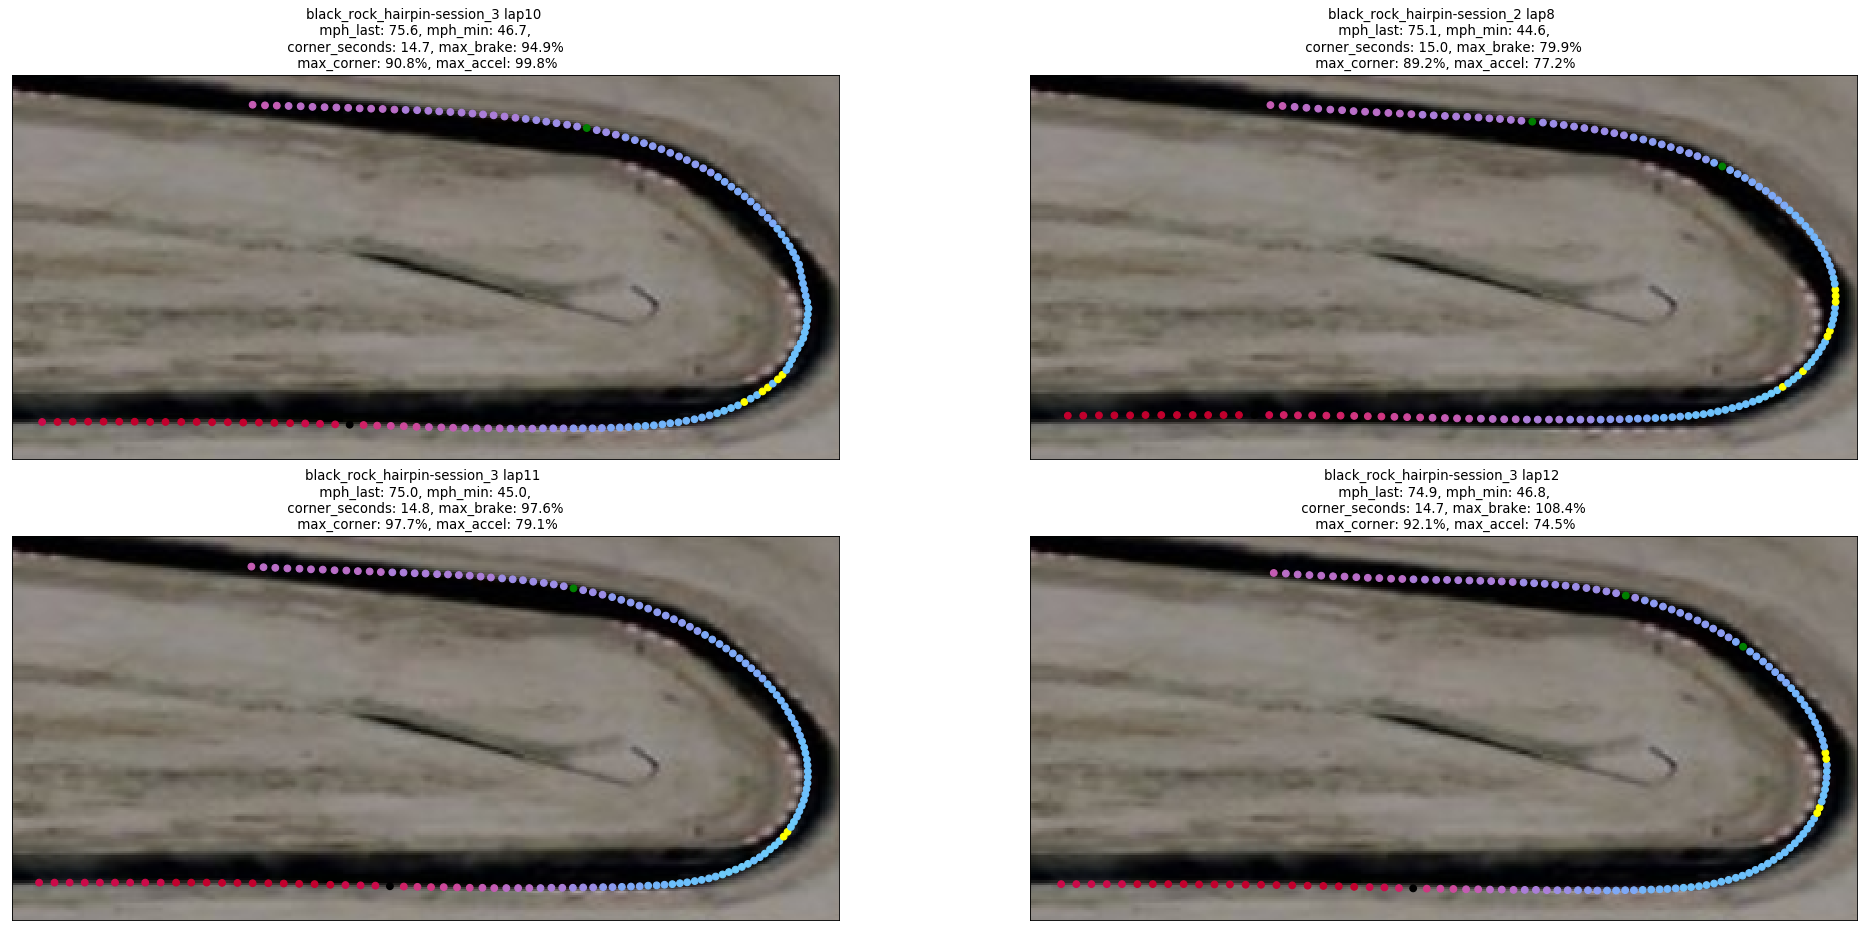

In [337]:
pre_vis_df_list = []
vis_df_list = []
vis_df_meta_list = []
vis_meta_list = []
vis_title_list = []

if analysis_set.value == "Top 4":
    vis_filter = corner_times[(corner_times[corner_rank.value] <=4) & 
                              (corner_times.corner_name_min == corner_nm.value)].sort_values(by=corner_rank.value)['lap_corner'].to_list()
elif analysis_set.value == "Top and Bottom":
    max_rank = corner_times[corner_rank.value].max()
    vis_filter = corner_times[((corner_times[corner_rank.value] <=2) & 
                              (corner_times.corner_name_min == corner_nm.value)) |
                             ((corner_times[corner_rank.value] >= max_rank-1) &
                              (corner_times.corner_name_min == corner_nm.value))
                              ].sort_values(by=corner_rank.value)['lap_corner'].to_list()
for filt in vis_filter:
    vis_df = rd_clean[rd_clean.lap_corner == filt].copy()
    pre_vis_df_list.append(vis_df)
    vis_df_meta = corner_times[corner_times.lap_corner == filt].copy()
    vis_df_meta_list.append(vis_df_meta)
    vis_title_list.append(vis_df_meta['lap_corner'].values[0])
    vis_meta_list.append("mph_last: {:.1f}, mph_min: {:.1f}, \n corner_seconds: {:.1f}, max_brake: {:.1%} \n max_corner: {:.1%}, max_accel: {:.1%}".format( 
                             vis_df_meta['mph_last'].values[0],
                              vis_df_meta['mph_min'].values[0],
                              vis_df_meta['corner_seconds'].values[0],
                              vis_df_meta['brake_perc_max'].values[0],
                              vis_df_meta['corner_perc_max'].values[0],
                              vis_df_meta['accel_perc_max'].values[0]
                              ))   
    
#add gradients
min_speed = pre_vis_df_list[0]['mph'].min()-5
max_speed = pre_vis_df_list[0]['mph'].max()+5
for df in pre_vis_df_list:
    gradient_dict = gradients(df,'mph','brake_perc','corner_perc','accel_perc',min_speed,max_speed)
    df['gradient'] = gradient_dict[gradient_type.value]
    vis_df_list.append(df)

#get map bounds and set parameters for map
lat_min, lat_max, lon_min, lon_max = plot_bounds(vis_df_list[0]['latitude'],vis_df_list[0]['longitude'])
axis_names = [[0,0],[0,1],[1,0],[1,1]]
ratio = 1/((lat_max-lat_min)/(lon_max-lon_min))
size = 14

#start plotting
fig, axs = plt.subplots(2,2, figsize=(size*ratio, size), dpi=80)

for i,axis_names in enumerate(axis_names): 
    data = vis_df_list[i] 
    axs[axis_names[0],axis_names[1]].scatter(data['longitude'],data['latitude'], c=data['gradient'])
    axs[axis_names[0],axis_names[1]].set_title("%s \n %s" % (vis_title_list[i],vis_meta_list[i]))
    if internet.value == 'online':
        map = Basemap(llcrnrlon=lon_min,urcrnrlon=lon_max,llcrnrlat=lat_min,urcrnrlat=lat_max,resolution = 'c', ax = axs[axis_names[0],axis_names[1]])
        map.arcgisimage(service='ESRI_Imagery_World_2D', verbose= True) 
    else:
        axs[axis_names[0],axis_names[1]].set_xlim([lon_min,lon_max])
        axs[axis_names[0],axis_names[1]].set_ylim([lat_min,lat_max])
        axs[axis_names[0],axis_names[1]].xaxis.set_visible(False)
        axs[axis_names[0],axis_names[1]].yaxis.set_visible(False)
    
plt.show() 

# Map and Plot

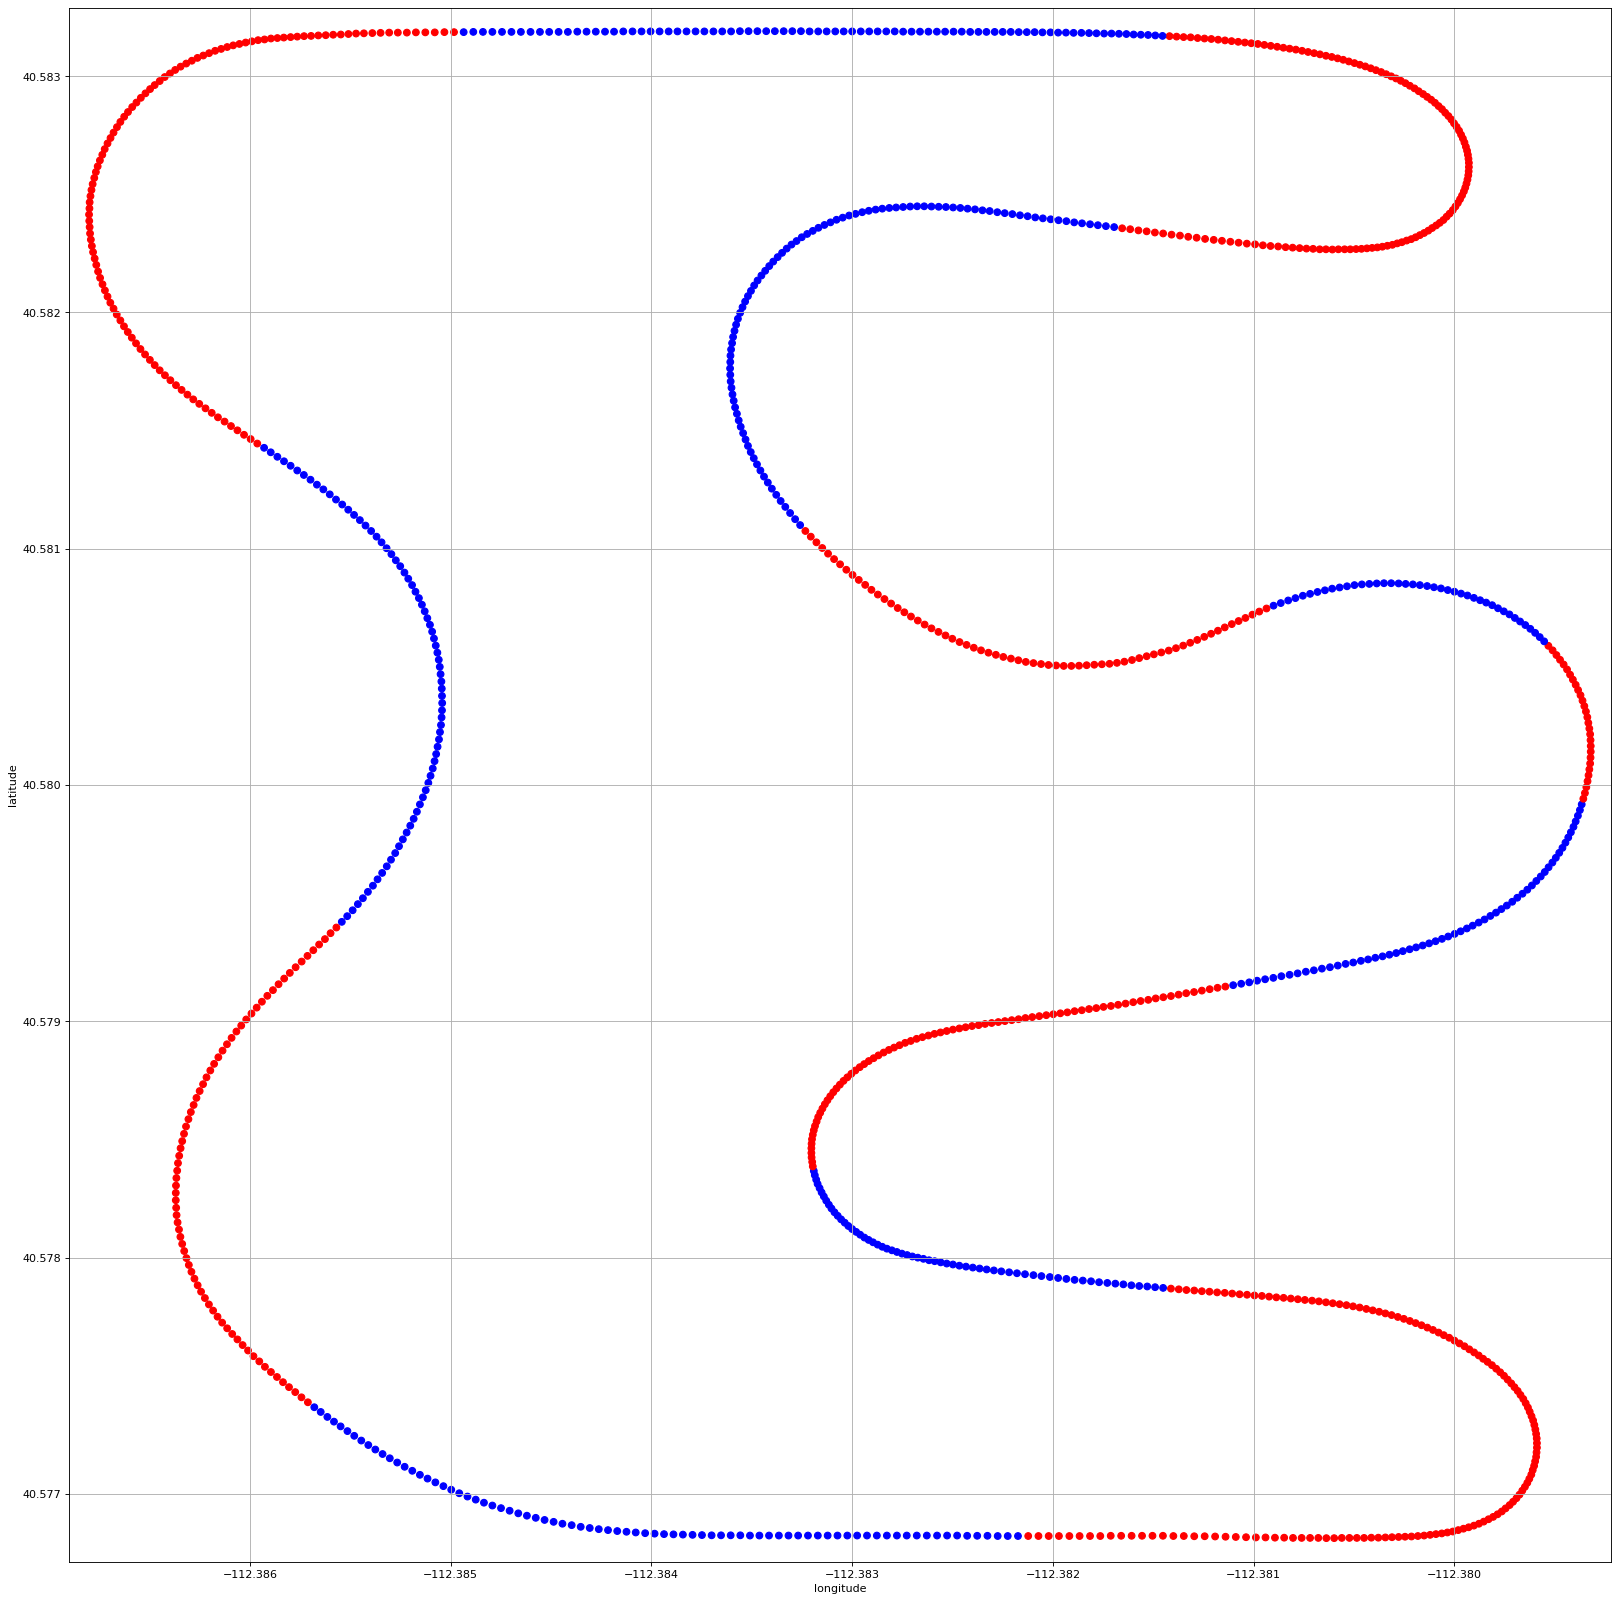

In [128]:
#prep data
one_lap_filter = lap_times[lap_times.lap_rank == 1]['lap_name'].values[0]
one_lap = rd_clean[rd_clean.lap_name == one_lap_filter].copy()
lat_min, lat_max, lon_min, lon_max = plot_bounds(one_lap['latitude'],one_lap['longitude'])
#plot it
plt.figure(figsize=(20, 20), dpi=80)
plt.grid(which='both')
plt.tight_layout()
plt.xlim([lon_min,lon_max])
plt.ylim([lat_min,lat_max])
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ticklabel_format(useOffset=False)
plt.title ='test'
plt.scatter(one_lap['longitude'],one_lap['latitude'], c=one_lap['corner_color']);

In [65]:
one_lap

,start_date,start_time,lap_number,session_time,lap_time,long_acceleration,lattitude,gps_lat_acceleration,heading,rpm,gps_distance,gps_long_acceleration,lat_acceleration,longitude,gps_speed,num_satellites,throttle_position,file,mph,lap_name
